In [37]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yakin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yakin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [24]:
url = r'https://raw.githubusercontent.com/alrakomala/DataScienceDCI/main/aplicacion_algoritmos_ML/SMSSpamCollection.dat'
df = pd.read_csv(url, sep='\t', names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df.shape

(5572, 2)

In [26]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

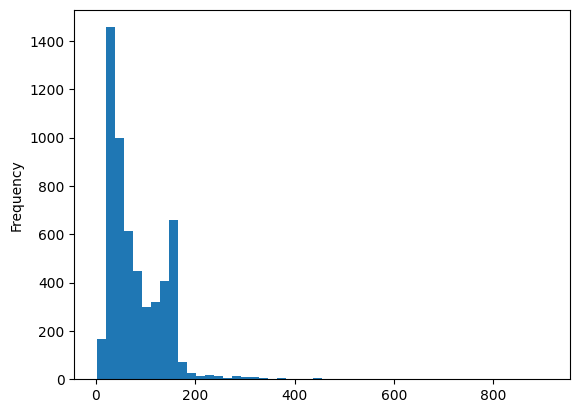

In [28]:
df['length'].plot(bins=50, kind='hist'); 

In [29]:
df[df['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

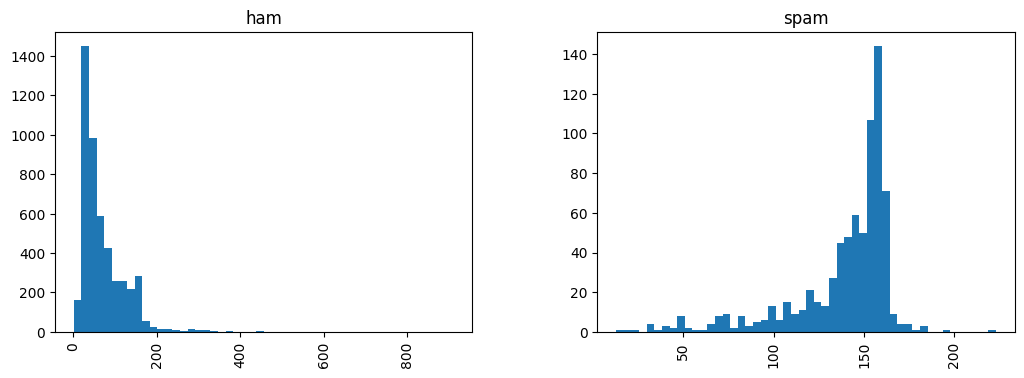

In [30]:
df.hist(column='length', by='label', bins=50, figsize=(12,4));

In [31]:
df[df['message'].str.contains('money')].head()

,label,message,length
70,ham,Wah lucky man... Then can save money... Hee...,46
127,ham,"Just so that you know,yetunde hasn't sent mone...",244
176,ham,Let me know when you've got the money so carlo...,65
181,ham,You lifted my hopes with the offer of money. I...,159
283,ham,Ok. I asked for money how far,29


**Procesamiento de Texto**

In [32]:
import string

msg = 'example! of message with comma, dots... and others?=(#)'

nopunc = [c for c in msg if c not in string.punctuation]
nopunc = ''.join(nopunc)
nopunc

'example of message with comma dots and others'

In [33]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
def no_punct(text):
    nopunc = [c for c in text if c not in string.punctuation]
    return ''.join(nopunc)
     
df['message_no_punct'] = df['message'].apply(no_punct)

**Tokenizar**

In [38]:
tokenized = df['message_no_punct'].apply(nltk.word_tokenize) 
tokenized

0       [Go, until, jurong, point, crazy, Available, o...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, U, c, already, t...
4       [Nah, I, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568         [Will, ü, b, going, to, esplanade, fr, home]
5569    [Pity, was, in, mood, for, that, Soany, other,...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                     [Rofl, Its, true, to, its, name]
Name: message_no_punct, Length: 5572, dtype: object

In [39]:
from nltk.corpus import stopwords

stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [40]:
def procesar_texto(text):
    nopunc = [c for c in text if c not in string.punctuation]
    nopunc =  ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [41]:
df['message'].apply(procesar_texto)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

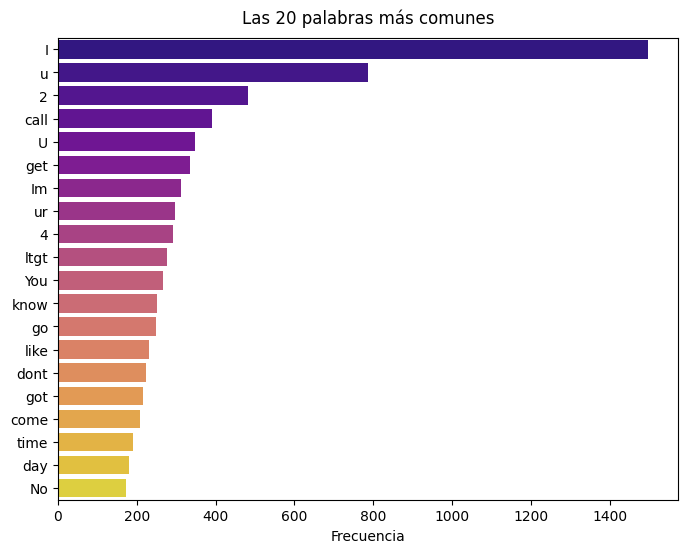

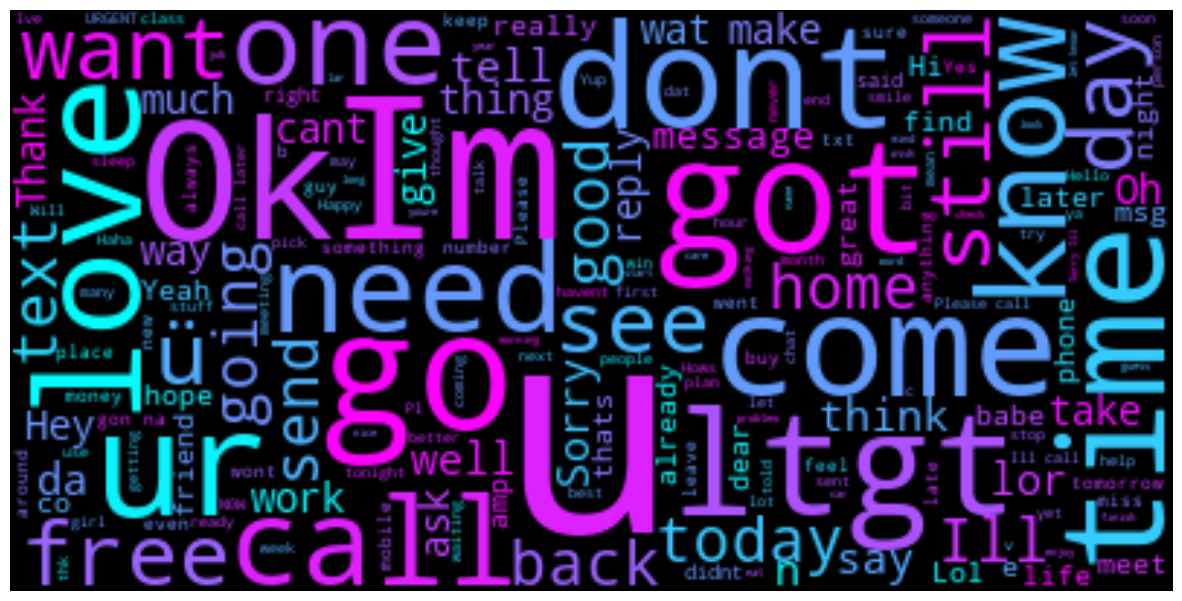

In [42]:
tokenizar = df['message_no_punct'].apply(nltk.word_tokenize) 
all_words = tokenizar.sum() #union en una sola lista

freq_dist = nltk.FreqDist(all_words)

no_stop_words = [word for word in all_words if word not in stopwords.words('english')]
freq_dist_no_stop_words = nltk.FreqDist(no_stop_words)

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(20))))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

sns.barplot(x = pd.to_numeric(most_common_20[:, 1]), y = most_common_20[:, 0], ax=ax, palette='plasma', orient='h');
ax.set_title('Las 20 palabras más comunes', pad=10)
ax.set_xlabel('Frecuencia')

from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100, background_color="black", colormap='cool').generate(' '.join(no_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

**Vectorización**

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
# Bag-of-Words (bow), conteo de palabras únicas
bow_transformer = CountVectorizer(analyzer=procesar_texto).fit(df['message'])

print(len(bow_transformer.vocabulary_))

11425


In [45]:
print(df['message'][100])
print(procesar_texto(df['message'][100]))
bow_msg100 = bow_transformer.transform([df['message'][100]])
print(bow_msg100)

Please don't text me anymore. I have nothing else to say.
['Please', 'dont', 'text', 'anymore', 'nothing', 'else', 'say']
  (0, 3235)	1
  (0, 4701)	1
  (0, 6123)	1
  (0, 6282)	1
  (0, 8480)	1
  (0, 9554)	1
  (0, 10378)	1


In [46]:
df_bow = bow_transformer.transform(df['message'])

In [47]:
print('Sparse Matrix: ', df_bow.shape)
print('valores != 0: ', df_bow.nnz)

Sparse Matrix:  (5572, 11425)
valores != 0:  50548


**Normalización**

In [48]:
#term frequency-inverse document frequency
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(df_bow)
df_tfidf = tfidf_transformer.transform(df_bow)

**Modelo**

In [49]:
from sklearn.ensemble import RandomForestClassifier
#spam_detect_model = RandomForestClassifier().fit(df_tfidf, df['label'])

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(df['message'], df['label'], test_size=0.2)

In [50]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=procesar_texto)),  # valores numericos unicos para cada palabra
    ('tfidf', TfidfTransformer()),  # importancia de cada palabra
    ('classifier', RandomForestClassifier()),  # modelo
])

In [51]:
pipeline.fit(msg_train,label_train);

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function procesar_texto at 0x000002268937C160>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

Score:  0.9713004484304932


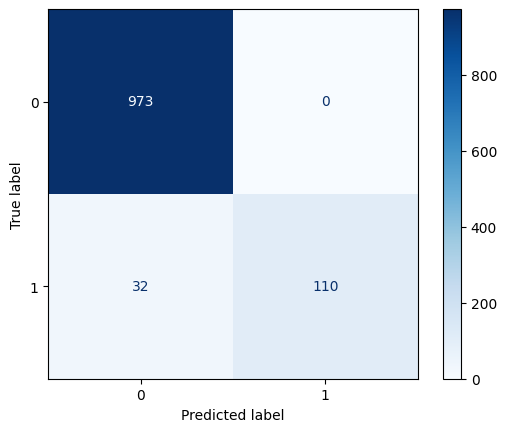

In [52]:
predicciones = pipeline.predict(msg_test)

print('Score: ', pipeline.score(msg_test, label_test))

matriz_confusion = confusion_matrix(label_test, predicciones)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

# Ejercicio:
Replicar este procedimiento con otro conjunto de datos

In [57]:
df = pd.read_csv(r"C:\Users\yakin\OneDrive - Universidad de Guanajuato\Documentos\Universidad de Guanajuato\8vo Semestre\Análisis de Datos\Recursos\Tweets.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [74]:
df['text'] = df['text'].astype('str')

In [75]:
df.dtypes

textID           object
text             object
selected_text    object
sentiment        object
dtype: object

In [77]:
df['length'] = df['text'].apply(len)
df.head()

,textID,text,selected_text,sentiment,length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46
2,088c60f138,my boss is bullying me...,bullying me,negative,25
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75


In [78]:
df.length.describe()

count    27481.000000
mean        68.327645
std         35.605403
min          3.000000
25%         39.000000
50%         64.000000
75%         97.000000
max        141.000000
Name: length, dtype: float64

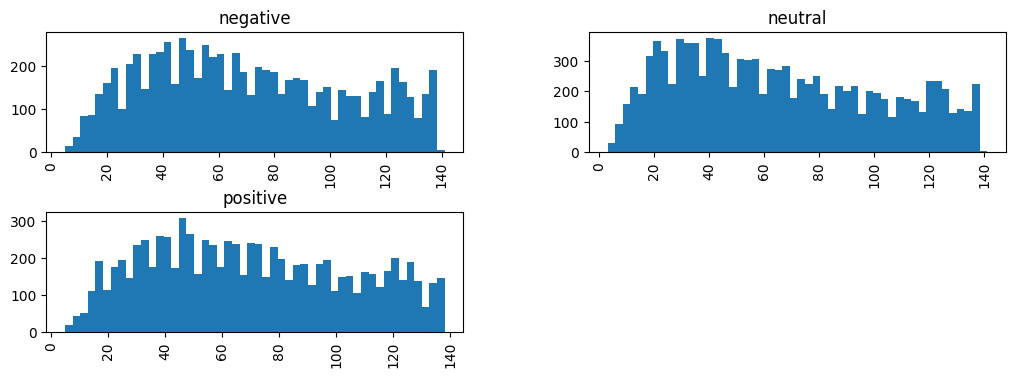

In [80]:
df.hist(column='length', by='sentiment', bins=50, figsize=(12,4));

### Procesamiento del texto

In [81]:
def no_punct(text):
    nopunc = [c for c in text if c not in string.punctuation]
    return ''.join(nopunc)
     
df['text_no_punct'] = df['text'].apply(no_punct)
df.head()

,textID,text,selected_text,sentiment,length,text_no_punct
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,Id have responded if I were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,Sooo SAD I will miss you here in San Diego
2,088c60f138,my boss is bullying me...,bullying me,negative,25,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,Sons of why couldnt they put them on the rel...


In [83]:
tokenized = df['text_no_punct'].apply(nltk.word_tokenize) 
tokenized

0                [Id, have, responded, if, I, were, going]
1        [Sooo, SAD, I, will, miss, you, here, in, San,...
2                             [my, boss, is, bullying, me]
3                      [what, interview, leave, me, alone]
4        [Sons, of, why, couldnt, they, put, them, on, ...
                               ...                        
27476    [wish, we, could, come, see, u, on, Denver, hu...
27477    [Ive, wondered, about, rake, to, The, client, ...
27478    [Yay, good, for, both, of, you, Enjoy, the, br...
27479                            [But, it, was, worth, it]
27480    [All, this, flirting, going, on, The, ATG, smi...
Name: text_no_punct, Length: 27481, dtype: object

In [86]:
from nltk.corpus import stopwords

stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [87]:
def procesar_texto(text):
    nopunc = [c for c in text if c not in string.punctuation]
    nopunc =  ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [88]:
df['text'].apply(procesar_texto)
df.head()

,textID,text,selected_text,sentiment,length,text_no_punct
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,Id have responded if I were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,Sooo SAD I will miss you here in San Diego
2,088c60f138,my boss is bullying me...,bullying me,negative,25,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,Sons of why couldnt they put them on the rel...


### Modelo

In [89]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(df['text'], df['sentiment'], test_size=0.2)

In [91]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=procesar_texto)),  # valores numericos unicos para cada palabra
    ('tfidf', TfidfTransformer()),  # importancia de cada palabra
    ('classifier', RandomForestClassifier()),  # modelo
])

In [94]:
pipeline.fit(msg_train,label_train);

Score:  0.6880116427142078


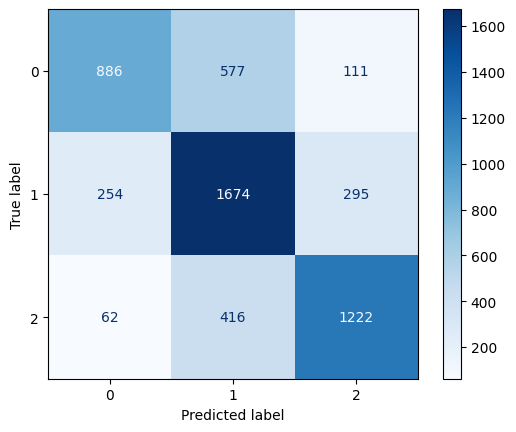

In [95]:
predicciones = pipeline.predict(msg_test)

print('Score: ', pipeline.score(msg_test, label_test))

matriz_confusion = confusion_matrix(label_test, predicciones)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);